# Prediction of survival in Titanic Disaster, using Linear Regression

# 1)  Importing of Necessary Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Loading of Training DataSet

In [2]:
titanic_train = pd.read_csv('train.csv', index_col='Name')
titanic_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3) Visualization of overall dataset

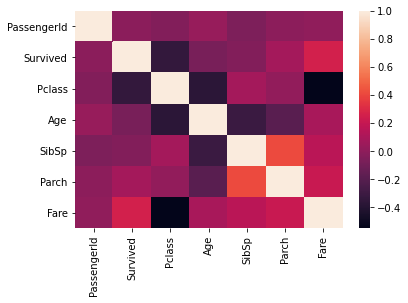

In [3]:
# Correlation matrix is used to detemine the relation between each feature with the other feature. Also it determines which
#feature have more impact on our dataset for further analysis.
#(darker the color less impact it'll have on our dataset)
sns.heatmap(titanic_train.corr()) 


# 4) Preprocessing of Train dataset + Visualization

In [4]:
train_df = pd.DataFrame(titanic_train)
train_df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Palsson, Master. Gosta Leonard",8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0,0,2,347742,11.1333,NaN,S


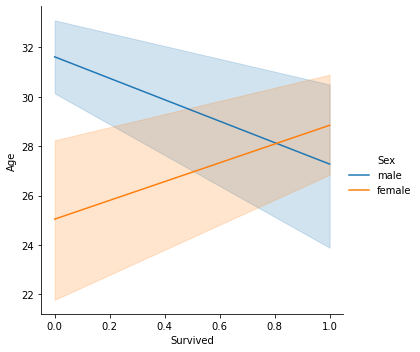

In [5]:
sns.relplot('Survived', 'Age', hue = 'Sex', data=train_df, kind='line')

In [6]:
train_df.drop(['Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass', 'Sex'], axis = 1, inplace = True)
train_df

,PassengerId,Survived,Age,SibSp,Parch
Name,,,,,
"Braund, Mr. Owen Harris",1,0,22.0,1,0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,38.0,1,0
"Heikkinen, Miss. Laina",3,1,26.0,0,0
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,35.0,1,0
"Allen, Mr. William Henry",5,0,35.0,0,0
...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,27.0,0,0
"Graham, Miss. Margaret Edith",888,1,19.0,0,0
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,NaN,1,2


In [7]:
train_df.isnull()

,PassengerId,Survived,Age,SibSp,Parch
Name,,,,,
"Braund, Mr. Owen Harris",False,False,False,False,False
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",False,False,False,False,False
"Heikkinen, Miss. Laina",False,False,False,False,False
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,False,False,False,False
"Allen, Mr. William Henry",False,False,False,False,False
...,...,...,...,...,...
"Montvila, Rev. Juozas",False,False,False,False,False
"Graham, Miss. Margaret Edith",False,False,False,False,False
"Johnston, Miss. Catherine Helen ""Carrie""",False,False,True,False,False


In [8]:
#Replace NaN value with Mean
age = train_df['Age']
#age
age_mean = age.mean()
age_mean = int(age_mean)
age.fillna(age_mean, inplace= True)
age.describe()

count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
dtype: int64

# 5) Loading Test Data & Preprocessing + Visualization

In [10]:
titanic_test = pd.read_csv('test.csv', index_col='Name')
titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Kelly, Mr. James",892,3,male,34.5,0,0,330911,7.8292,NaN,Q
"Wilkes, Mrs. James (Ellen Needs)",893,3,female,47.0,1,0,363272,7.0000,NaN,S
"Myles, Mr. Thomas Francis",894,2,male,62.0,0,0,240276,9.6875,NaN,Q
"Wirz, Mr. Albert",895,3,male,27.0,0,0,315154,8.6625,NaN,S
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
"Spector, Mr. Woolf",1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
"Oliva y Ocana, Dona. Fermina",1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
"Saether, Mr. Simon Sivertsen",1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


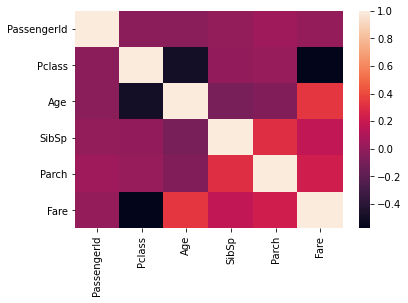

In [11]:
sns.heatmap(titanic_test.corr()) 

In [12]:
test_df = pd.DataFrame(titanic_test)
test_df.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Kelly, Mr. James",892,3,male,34.5,0,0,330911,7.8292,NaN,Q
"Wilkes, Mrs. James (Ellen Needs)",893,3,female,47.0,1,0,363272,7.0000,NaN,S
"Myles, Mr. Thomas Francis",894,2,male,62.0,0,0,240276,9.6875,NaN,Q
"Wirz, Mr. Albert",895,3,male,27.0,0,0,315154,8.6625,NaN,S
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,3,female,22.0,1,1,3101298,12.2875,NaN,S
"Svensson, Mr. Johan Cervin",897,3,male,14.0,0,0,7538,9.2250,NaN,S
"Connolly, Miss. Kate",898,3,female,30.0,0,0,330972,7.6292,NaN,Q
"Caldwell, Mr. Albert Francis",899,2,male,26.0,1,1,248738,29.0000,NaN,S
"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",900,3,female,18.0,0,0,2657,7.2292,NaN,C


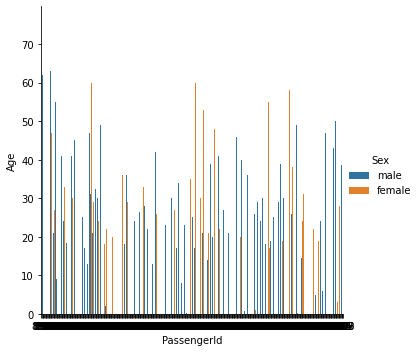

In [13]:
sns.catplot('PassengerId', 'Age', hue = 'Sex', data=test_df, kind='bar')

# 6) Feature Engineering

In [14]:
test_df.drop(['Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass', 'Sex'], axis = 1, inplace = True)
test_df

,PassengerId,Age,SibSp,Parch
Name,,,,
"Kelly, Mr. James",892,34.5,0,0
"Wilkes, Mrs. James (Ellen Needs)",893,47.0,1,0
"Myles, Mr. Thomas Francis",894,62.0,0,0
"Wirz, Mr. Albert",895,27.0,0,0
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,22.0,1,1
...,...,...,...,...
"Spector, Mr. Woolf",1305,NaN,0,0
"Oliva y Ocana, Dona. Fermina",1306,39.0,0,0
"Saether, Mr. Simon Sivertsen",1307,38.5,0,0


In [15]:
test_df.isnull()

,PassengerId,Age,SibSp,Parch
Name,,,,
"Kelly, Mr. James",False,False,False,False
"Wilkes, Mrs. James (Ellen Needs)",False,False,False,False
"Myles, Mr. Thomas Francis",False,False,False,False
"Wirz, Mr. Albert",False,False,False,False
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False,False,False,False
...,...,...,...,...
"Spector, Mr. Woolf",False,True,False,False
"Oliva y Ocana, Dona. Fermina",False,False,False,False
"Saether, Mr. Simon Sivertsen",False,False,False,False


In [16]:
#Replace NaN value with Mean
age = test_df['Age']
#age
age_mean = age.mean()
age_mean = int(age_mean)
age.fillna(age_mean, inplace= True)
age.describe()

count    418.000000
mean      30.216507
std       12.635016
min        0.170000
25%       23.000000
50%       30.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [17]:
test_df.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
dtype: int64

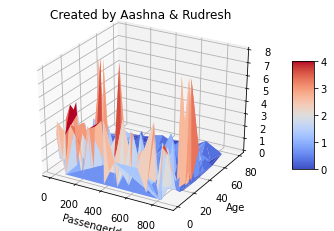

In [18]:
#trisurf is used for triangular surface
fig = plt.figure()
ax = fig.gca(projection='3d')
surf= ax.plot_trisurf(train_df['PassengerId'], train_df['Age'], train_df['SibSp'], cmap=plt.cm.coolwarm, linewidth=0.2)
plt.title('Created by Aashna & Rudresh')
plt.xlabel('PassengerId')
plt.ylabel('Age')
#plt.show()
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()


In [19]:
test_df

,PassengerId,Age,SibSp,Parch
Name,,,,
"Kelly, Mr. James",892,34.5,0,0
"Wilkes, Mrs. James (Ellen Needs)",893,47.0,1,0
"Myles, Mr. Thomas Francis",894,62.0,0,0
"Wirz, Mr. Albert",895,27.0,0,0
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,22.0,1,1
...,...,...,...,...
"Spector, Mr. Woolf",1305,30.0,0,0
"Oliva y Ocana, Dona. Fermina",1306,39.0,0,0
"Saether, Mr. Simon Sivertsen",1307,38.5,0,0


# 7) Spliting data into input and label/output/target

In [20]:
X_train = train_df.iloc[:, [3, 4]].values
y_train = train_df.iloc[:,[ 2]].values
X_test = test_df.iloc[:,[2, 3]].values
y_test = test_df.iloc[:, [ 1]].values

In [21]:
#X_train
X_train.shape

(891, 2)

In [22]:
y_train
y_train.shape

(891, 1)

In [23]:
X_test.shape

(418, 2)

In [24]:
y_test.shape

(418, 1)

# 8) Model Defining

In [26]:
#Fitting Linear Regression model to Training Set
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train) #gives the best fit line

LinearRegression()

# 9) Final Prediction

In [27]:
pred = reg.predict(X_test)
pred

array([[31.34420687],
       [29.0684072 ],
       [31.34420687],
       [31.34420687],
       [27.51253756],
       [31.34420687],
       [31.34420687],
       [27.51253756],
       [31.34420687],
       [26.79260753],
       [31.34420687],
       [31.34420687],
       [29.0684072 ],
       [29.0684072 ],
       [29.0684072 ],
       [29.0684072 ],
       [31.34420687],
       [31.34420687],
       [29.0684072 ],
       [31.34420687],
       [29.0684072 ],
       [29.78833724],
       [31.34420687],
       [29.78833724],
       [24.40079829],
       [29.0684072 ],
       [29.78833724],
       [31.34420687],
       [31.34420687],
       [26.79260753],
       [29.0684072 ],
       [26.79260753],
       [25.95666793],
       [25.95666793],
       [29.0684072 ],
       [31.34420687],
       [31.34420687],
       [31.34420687],
       [31.34420687],
       [31.34420687],
       [29.78833724],
       [31.34420687],
       [31.34420687],
       [31.34420687],
       [29.0684072 ],
       [31

In [28]:
pred.shape

(418, 1)

# 10) Converting predicted float value into integer

In [29]:
final_pred = np.around(pred)
final_pred

array([[31.],
       [29.],
       [31.],
       [31.],
       [28.],
       [31.],
       [31.],
       [28.],
       [31.],
       [27.],
       [31.],
       [31.],
       [29.],
       [29.],
       [29.],
       [29.],
       [31.],
       [31.],
       [29.],
       [31.],
       [29.],
       [30.],
       [31.],
       [30.],
       [24.],
       [29.],
       [30.],
       [31.],
       [31.],
       [27.],
       [29.],
       [27.],
       [26.],
       [26.],
       [29.],
       [31.],
       [31.],
       [31.],
       [31.],
       [31.],
       [30.],
       [31.],
       [31.],
       [31.],
       [29.],
       [31.],
       [31.],
       [31.],
       [31.],
       [28.],
       [29.],
       [31.],
       [25.],
       [21.],
       [31.],
       [21.],
       [31.],
       [31.],
       [29.],
       [31.],
       [31.],
       [31.],
       [31.],
       [31.],
       [24.],
       [31.],
       [31.],
       [31.],
       [31.],
       [23.],
       [31.],
      

# 11) Calculating Slope of the model

In [30]:
#Calculating Intercept
print(reg.intercept_)

[31.34420687]


In [31]:
accuracy = np.abs(np.mean(pred - y_test))
accuracy

0.5008581009823564

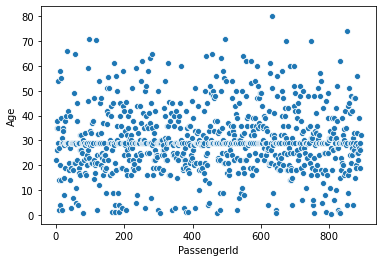

In [32]:
sns.scatterplot('PassengerId', 'Age', data=train_df) #dotted line denotes the best fit line